L03/supergruppe_diskussion.ipynb: resume i tekstform \
L04/dataanalyse.ipynb \
L04/pipelines.ipynb: Qa+b+c+d \
L05/linear_regression_1.ipynb: Qa+b \
L05/gradient_descent.ipynb: Qa+b+c+d+e \
L06/ann.ipynb: Qa+b+c+d+e+f [OPTIONAL: Qg] 

<h1><center>SWMAL-01 Assignment O2</center></h1>
<h3><center>Written By Group 1</center></h3>

| NAME | Studienummer | Field of study|
| --- | :---: | :---: |
|Malte Flammild| 201911332 | E|
|Simon Ryvold   | 201909364 | E|
|Christian Lykke Skovgaard Madsen | 201911330 | E|
|Jonas Borup Andersen| 201911363| E|

Date: 2022-10-13

# 1. Summary of End-to-End chapter

indledning

## 

Conclusion

# 2. Dataanalyse

Vi vil i dette afsnit beskrive, samt lave noget indledende dataanalyse på vores data til vores slutprojekt.

## 2.1 Beskrivelse af datasæt til O4 projekt

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

Som en del af vores O4 projekt, har vi i gruppen besluttet at lave en machine learning algoritme, som ud fra billededata kan klassificere hvordan vejret er på det pågældende billede.

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

Vi har fundet et datasæt med 1500 forskellige billeder af 5 forskellige vejrtyper. Datasættet er fundet på Kaggle og er lavet af Farjana Kabir. 

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget bestemt, lave en regression eller klassifikation, el.lign. 


## 2.2 Dataanalyse af eget datasæt

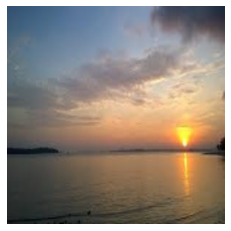

In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#for importing images
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import load_img, img_to_array

datapath = os.path.join("../weather", "train", "")

def load_image(path):
  
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

def show_image(image, title=None):

    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

imagearray = 
    
for i i
image = load_image(datapath + "Image_1.jpg")

show_image(image)


# 3. Pipelines

I denne opgave vil vi træne en "multilayer perceptron" (MLP) algoritme, som er baseret på neural netværk. Vi vil yderligere bruge scikit learn's pipelines til at classificere vores data forberedelse og træning på OECD's datasæt. Først har vi noget setup kode, som henter dataen vi brugte i L01 og herefter bruger vi MLP regressor og linear regressor til at få en score ud. Vi burde se at den linear score ligger på 0.73 og mlp scoren er negativ, hvilket indikere at modellen ikke kunne "fit" dataen.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
MLP    .score(X, y)=-36171.62

OK


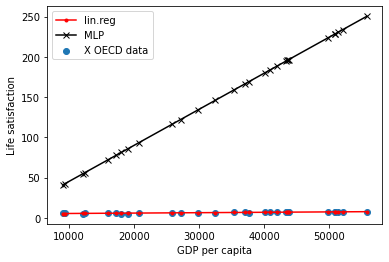

In [2]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2
    
    def Fill(s, n):
        while(len(s)<n):
            s += " "
        return s

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{Fill(name_model1,l)}.score(X, y)={score_model1:0.2f}")
    print(f"{Fill(name_model2,l)}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y)
print("\nOK")

## 3.1 Create a Min/max scaler for the MLP

Fordi at MLP algoritmen er baseret på et neural netværk, så forventer den et input i rangen $[0; 1]$ eller i nogle tilfælde $[-1; 1]$. Vi vil derfor bruge min/max skalering og standardisering til at skalere OECD-dataen ned. Vores OECD datasæt har en range på $[9055; 55805]$ BNP pr. indbygger. Ved brug af følgende formel kan vi transformeret OECD rangen om til $[0; 1]$.

$$X_{scaled} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

Dette skulle gerne hjælpe modellen til at "fit" dataen bedre og forhåbentlig få en bedre score ud, vi tester det herunder.

np.min(X) = 9055
np.max(X) = 55805
np.min(X_scaled) = 0.0
np.max(X_scaled) = 1.0
MLP.score(X, y) = 0.73


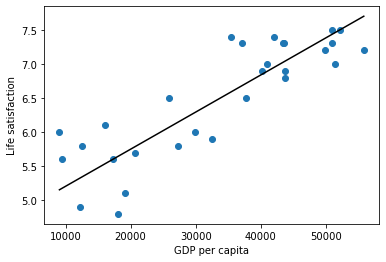

In [3]:
# Min/max scaler
X_min = np.min(X)
X_max = np.max(X)
X_scaled = (X-X_min)/(X_max - X_min)

#Retraining the mlp 
mlp.fit(X_scaled, y.ravel())
y_pred_mlp = mlp.predict((X-X_min)/(X_max - X_min))
plt.plot(X, y_pred_mlp, "k")
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

score_mlp = r2_score(y, y_pred_mlp)
print(f"np.min(X) = {np.min(X):0.0f}")
print(f"np.max(X) = {np.max(X):0.0f}")
print(f"np.min(X_scaled) = {np.min(X_scaled)}")
print(f"np.max(X_scaled) = {np.max(X_scaled)}")
print(f"MLP.score(X, y) = {score_mlp:0.2f}")

Som det kan ses så får vi en $R^2$ på 0.72, som er meget tæt på den linear regressor model score på 0.73. Det står altså helt klart at $R^2$ er meget bedre, nu hvor modellen er blevet trænet med skaleret data.


## 3.2 Scikit-learn Pipelines

Istedet for at vi manuelt skalere vores data, så kan man bruge *sklearn.preprocessing.MinMaxScaler*, derudover kan vi pipelines, hvor vi kan indsætte forskellige machinelearning elementer. F.eks. kan vi indsætte en "scaler" og "mlp" elementer.

pipe1.score(X, y) = 0.73
linreg.score(X, y) = 0.73


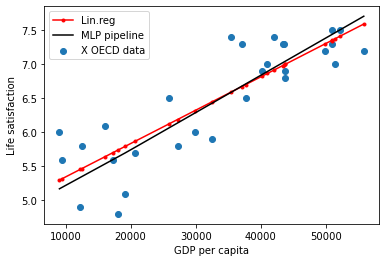

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe1 = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe1.fit(X, y)
y_pred_pipe1 = pipe1.predict(X)
y_pred_linreg = linreg.predict(X)

print(f"pipe1.score(X, y) = {pipe1.score(X, y):0.2f}")
print(f"linreg.score(X, y) = {linreg.score(X, y):0.2f}")

plt.plot(X, y_pred_linreg, "r.-")
plt.plot(X, y_pred_pipe1, "k")
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend(["Lin.reg", "MLP pipeline", "X OECD data"])

<a id=’3.2_fig1’></a>

På grafen ses forskellen på den lineære regressor og vores MLP pipeline regressor. Forskellen mellem de to metoder er minimal, men pipelines er bliver meget hurtigt nemt at integrere og mindsker muligheden for fejl.

## 3.3 Outliers and the Min-max Scaler vs. the Standard Scaler

I denne opgave vil vi forklare det fundamentale problem med en min-max scaler og outliers. Derudover vil vi oprette en test med en anden scaler `sklearn.preprocessing.StandardScaler` og sammenligne den med resultatet fra 3.2 med mlp pipeline. 

Det som kan være et problem med `MinMaxScaler` er at den er højt påvirket af outliers. Hvis man tror at man har mange outliers i sit datasæt, så kan det være en fordel at bruge `StandardScaler` da den vægter outliers mindre.

pipe1.min/max.score(X, y) = 0.27
pipe2_standard.score(X, y) = 0.77


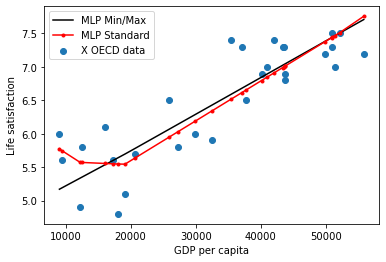

In [7]:
from sklearn.preprocessing import StandardScaler 

pipe2 = Pipeline( 
    [ 
        ('scaler',StandardScaler()), 
        ('mlp', mlp) 
    ] 
)

pipe2.fit(X,y) 
y_pred_pipe2 = pipe2.predict(X)

plt.plot(X, y_pred_pipe1, "k")
plt.plot(X, y_pred_pipe2, "r.-")
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend(["MLP Min/Max", "MLP Standard", "X OECD data"])

Vi kan se på resultatet at standard scaler MLP metoden giver en bedre score end min/max scaler scoren.

## 3.4 Modify the MLP Hyperparameters

Conclusion

# 4. Linear Regression

indledning

Målet i denne opgave er at finde det bedste argument "w" der mininmere "sum-of-squares" for hvert eneste input.

## 4.1 skriv et Python funktion der bruger den "lukkede form" for at finde w*

$$
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$

In [15]:
# TODO: Qa...

# TEST DATA: 
import numpy as np
from libitmal import utils as itmalutils
itmalutils.ResetRandom()

X1 = np.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
y1 = np.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
w1_expected = np.array([4.046879011698, 1.880121487278])


#itmalutils.AssertInRange(w1_expected, w1_expected,eps=1E-9)
#assert False, "find the least-square solution for X1 and y1, your implementation here, say from [HOML] p.114"

#indsæt bias
X1 = np.c_[(np.ones((X1.shape[0],1)), X1)]
X1T = X1.transpose()
print(X1)
#print(X1T@X1)

w1 = (np.linalg.inv(X1T@X1))@(X1T@y1)

#print("ok")
print("w1_expected = ",w1_expected)
print("w1 = ",w1)


# TEST VECTOR:
#itmalutils.PrintMatrix(w1, label="w1=", precision=12)
#itmalutils.AssertInRange(w1,w1_expected,eps=1E-9)

[[1.00000000e+00 8.34044009e-01]
 [1.00000000e+00 1.44064899e+00]
 [1.00000000e+00 2.28749635e-04]
 [1.00000000e+00 6.04665145e-01]]
w1_expected =  [4.04687901 1.88012149]
w1 =  [4.04687901 1.88012149]


## 4.2 find afgrænsningerne til "the least-square method"

In [ ]:
# TODO: Qb...

# TEST DATA: Matrix, taken from [HOML], p108
M=100
N=1
print(f'More test data, M={10}, N={N}...')

X2=2 * np.random.rand(M,N)
y2=4 + 3*X2 + np.random.randn(M,1)
y2=y2[:,0] # well, could do better here!

assert False, "find the least-square solution for X2 and y2, again"

# w2 = 

Conclusion

# Gradient Descent

indledning

##

Conclusion

# Ann

indledning

##

Conclusion